# Проект: Исследование гипотез интернет-магазина. Анализ A/B тестов.

<a id="num1"></a>
## Цели

Был подготовлен список гипотез для увеличения выручки, необходимо проверить его с помощью фреймворков ICE и RICE, и определить приоритетный и перспективные. 

Были проведены A/B-тесты, следует проанализировать результаты и сделать выводы. 

<a id="num2"></a>
## Вопросы

1. __Применить фреймворк ICE и RICE для приоритизации гипотез.__
    - Исследовать изменения и сделайте выводы. 

2. __Провести A/B-тест:__
    - Построить график кумулятивной выручки по группам. 
    - Построить график кумулятивного среднего чека по группам. 
    - Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
    - Построить график кумулятивного среднего количества заказов на посетителя по группам.
    - Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
    - Построить точечный график количества заказов по пользователям. 
    - Определить 95-й и 99-й перцентили количества заказов на пользователя.
    - Построить точечный график стоимостей заказов. 
    - Определить 95-й и 99-й перцентили стоимости заказов. 
    - Определить статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
    - Определить статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
    - Определить статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
    - Определить статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

3. __Принять решение по результатам теста.__

<a id="num3"></a>
## Оглавление 
* [1. Цели исследования](#num1)
* [2. Поставленные вопросы](#num2)
* [3. Оглавление](#num3)
* [4. Ключ к данным](#num4)
* [5. Подготовка данных](#num5)
    * [5.1. Библиотеки](#num51)
    * [5.2. Загрузка данных](#num52)
    * [5.3. Функции](#num53)
    * [5.4. Ознакомление с данными](#num54)
    * [5.5. Предобработка данных](#num55)
        * [5.5.1. Приведение названий к единому виду](#num551)
        * [5.5.2. Проверка на уникальность](#num552)
        * [5.5.3. Проверка данных](#num553)
            * [5.5.3.1. hypohtesis](#num5531)
            * [5.5.3.2 orders](#num5531)
            * [5.5.3.3 visitors](#num5533)
* [6. Исследование](#num6)
    * [6.1. Приоритизация гипотез](#num61)
        * [6.1.1. ICE](#num61)
        * [6.1.2. RICE](#num61)
        * [6.1.3. Анализ результатов между ICE и RICE](#num61)
* [7. Анализ A/B теста](#num7) 
    * [7.1. График кумулятивной выручки по группам](#num71)
    * [7.2. График кумулятивного среднего чека по группам](#num72)
    * [7.3. График относительного изменения кумулятивного среднего чека группы B к группе A](#num73)
    * [7.4. График кумулятивного среднего количества заказов на посетителя по группам](#num74)
    * [7.5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A](#num75)
    * [7.6. График количества заказов по пользователям](#num76)
    * [7.7. Перцентили количества заказов на пользователя](#num77)
    * [7.8. График стоимостей заказов](#num78)
    * [7.9. Перцентили стоимости заказов](#num79)
    * [7.10. Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#num710)
    * [7.11. Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#num711)
    * [7.12. Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#num712)
    [7.13 Cтатистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным](#num713)
* [8. Выводы](#num8)  
* [9. Рекомендации](#num9)   
* [10. Дополнительная информация](#num10)   
    * [10.1. Сноски](#num101)

<a id="num4"></a>
## Ключ к данным 

<a id="num5"></a>
## Подготовка данных

<a id="num51"></a>
### Библиотеки

In [1]:
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from scipy import stats as st
import scipy.stats as stats

<a id="num52"></a>
### Загрузка данных

In [3]:
try:
    hypothesis = pd.read_csv("C:\\Users\\alena\\OneDrive\\Рабочий стол\\Python\\Датасеты проектов Яндекс\\Принятие решений в бизнесе\\hypothesis.csv") 
    orders = pd.read_csv("C:\\Users\\alena\\OneDrive\\Рабочий стол\\Python\\Датасеты проектов Яндекс\\Принятие решений в бизнесе\\orders.csv", parse_dates=['date']) 
    visitors = pd.read_csv("C:\\Users\\alena\\OneDrive\\Рабочий стол\\Python\\Датасеты проектов Яндекс\\Принятие решений в бизнесе\\visitors.csv", parse_dates=['date']) 
except:
    display('No data')

<a id="num53"></a>
### Функции

Функция ``data_head_desc_info`` отображает основную информацию о имеющихся данных из указанного файла. 

*data_head_desc_info(датафрейм)*.

In [4]:
def data_head_desc_info(data):
    try:
        print('\033[1m'+'1. Первые пять строк данных:'+'\033[0m')
        display(data.head(5))
        print('\033[1m'+'2. Описание данных:'+'\033[0m')
        display(data.describe())
        print('\033[1m'+'3. Общая информацию о датафрейме'+'\033[0m')
        display(data.info())
        print('\033[1m'+'4. Графическое отображение количества пропусков'+'\033[0m')
        display((data.isna().mean() * 100).sort_values().to_frame().style.format("{:.2f}", na_rep="").background_gradient('Blues'))
        print('\033[1m'+'5. Процент пропусков'+'\033[0m')
        display(round (1 - data.count()/data.shape[0], 2) * 100)
    except:
        return 'Проверьте параметры'

Функция ``data_isna_nuniq`` для получения короткой информации по определенным столбцам.  

*data_isna_nuniq (столбец по которому получаем информацию по пропускам и уникальным значениям)*.

In [5]:
def data_isna_nuniq(data):
    try:
        for column in data.columns:
            print('Столбец:', column)
            print('Количество пропусков:', data[column].isna().sum())
            print('Количество уникальных значений:', data[column].nunique())
    except Exception as e:
        return 'Проверьте параметры: {}'.format(str(e))

Функция ``lower`` для приведения названий столбцов к единому виду.  

*lower (датафрейм)*.

In [6]:
def lower(data):
    try:
        data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]
        display(data.head(0))
    except:
        return 'Проверьте параметры'

Палитра ``colors``: зададим предпочтительные для оформления цвета.

In [7]:
colors = (['#063751','#08527A',
           '#0B6DA2','#0E89CB',
           '#15A3EF','#3EB3F2',
           '#66C3F4','#8FD3F7',
           '#B7E3FA','#B7E3FA',
           '#8FD3F7','#66C3F4',
           '#3EB3F2','#15A3EF',
           '#0E89CB','#0B6DA2',
           '#08527A','#063751'])

Функция ``uniq`` для проверки датафрейма orders и производных от него на уникальность пользователей в группах теста.  

*uniq (датафрейм)*.

In [8]:
def uniq(data):
    users_a = data.query('group == "A"')['visitorid']
    users_b = data.query('group == "B"')['visitorid']
    matching_elements = users_b[users_b.isin(users_a)]
    display(matching_elements.nunique())
    return(matching_elements)

Функция ``cumulative`` для отображения графика по переданным данным. Используется в куммулятивных графиках 

*cumulative (ось х для первого элемента, ось у для первого элемента, ось х для второго элемента(при наличии), ось у для второго элемента(при наличии), первая линия значений(прерывающаяся), вторая линия значений(прерывающаяся))*.

In [9]:
def cumulative(a_x_axis, a_y_axis, b_x_axis=None, b_y_axis=None, axhline=None, one_y=None, two_y=None, y_name=None, x_name=None, title_name=None):
    trace_a = go.Scatter(
        x=a_x_axis,
        y=a_y_axis,
        mode='lines',
        name='Группа A',
        line=dict(color='blue'))

    fig = go.Figure(data=[trace_a])

    if b_x_axis is not None and b_y_axis is not None:
        trace_b = go.Scatter(
            x=b_x_axis,
            y=b_y_axis,
            mode='lines',
            name='Группа B',
            line=dict(color='red'))
        fig.add_trace(trace_b)
    if axhline=='one' and one_y is not None:
        fig.add_shape(
            type="line",
            x0=min(a_x_axis),  
            y0=one_y, 
            x1=max(a_x_axis), 
            y1=one_y,  
            line=dict(color="black", dash="dash")  # Цвет и стиль линии 
        )
    if axhline == 'two' and one_y is not None and two_y is not None:
        fig.add_shape(
            type="line",
            x0=min(a_x_axis),  
            y0=one_y,  
            x1=max(a_x_axis),  
            y1=one_y,  
            line=dict(color="black", dash="dash")  # Цвет и стиль линии 
        )
        fig.add_shape(
            type="line",
            x0=min(a_x_axis), 
            y0=two_y, 
            x1=max(a_x_axis),  
            y1=two_y,  
            line=dict(color="black", dash="dash")  # Цвет и стиль линии 
        )

    fig.update_layout(xaxis_title=x_name, yaxis_title=y_name, 
                  title=title_name,
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
    fig.show()
    return

<a id="num54"></a>
### Ознакомление с данными

Для исследования предоставлены данные в трех таблицах: ``hypothesis``, ``orders``, ``visitors``. Получим первичную информацию о них. 

Получим данные о ``hypothesis``.

In [10]:
data_head_desc_info(hypothesis)

1. Первые пять строк данных:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


2. Описание данных:


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


3. Общая информацию о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

4. Графическое отображение количества пропусков


,0
Hypothesis,0.00
Reach,0.00
Impact,0.00
Confidence,0.00
Efforts,0.00


5. Процент пропусков


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

In [11]:
pd.set_option('max_colwidth', 100)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


При ознакомлении с данными проблем в таблице ``hypothesis`` не выявлено, типы данных представлены верно, пропусков нет. 

Получим данные о ``orders``.

In [12]:
data_head_desc_info(orders)

1. Первые пять строк данных:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


2. Описание данных:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


3. Общая информацию о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

4. Графическое отображение количества пропусков


,0
transactionId,0.00
visitorId,0.00
date,0.00
revenue,0.00
group,0.00


5. Процент пропусков


transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

При ознакомлении с данными проблем в таблице ``orders`` не выявлено, типы данных представлены верно, пропусков нет. 

Получим данные о ``visitors``.

In [13]:
data_head_desc_info(visitors)

1. Первые пять строк данных:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


2. Описание данных:


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


3. Общая информацию о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

4. Графическое отображение количества пропусков


,0
date,0.00
group,0.00
visitors,0.00


5. Процент пропусков


date        0.0
group       0.0
visitors    0.0
dtype: float64

При ознакомлении с данными проблем в таблице ``visitors`` не выявлено, типы данных представлены верно, пропусков нет. 

Для работы представлены три таблицы ``hypothesis``, ``orders``, ``visitors``. 

В ``hypothesis`` 9 строк, 5 столбцов. 

В ``orders`` 1197 строк, 5 столбцов.

В ``visitors`` 62 строки, 3 столбца. 

Таблицы полные, пропусков нет. Типы данных у всех трех таблиц верные. 

В ``hypothesis`` столбцы именованы не корректно, это исправим далее. 

<a id="num55"></a>
### Предобработка данных

<a id="num551"></a>
#### Приведение названий к единому виду

В таблице ``hypothesis`` столбцы имеют не верные названия, изменим их. Также проверим остальные таблицы, чтобы полностью исключить иные варианты написания.

In [14]:
lower(hypothesis)

,hypothesis,reach,impact,confidence,efforts


In [15]:
lower(orders)

,transactionid,visitorid,date,revenue,group


In [16]:
lower(visitors)

,date,group,visitors


Теперь все таблицы имеют желаемый вид названий. 

<a id="num552"></a>
#### Проверка на уникальность

In [17]:
data_isna_nuniq(hypothesis)

Столбец: hypothesis
Количество пропусков: 0
Количество уникальных значений: 9
Столбец: reach
Количество пропусков: 0
Количество уникальных значений: 6
Столбец: impact
Количество пропусков: 0
Количество уникальных значений: 7
Столбец: confidence
Количество пропусков: 0
Количество уникальных значений: 7
Столбец: efforts
Количество пропусков: 0
Количество уникальных значений: 6


Всего в таблице представлено ``9`` уникальных гипотез ``hypothesis``. 

Охват пользователей представлен по 10-балльной шкале, в таблице уникальных значений — ``9`` от 1 до 10, столбец ``reach``. 

Влияние на пользователей представлено по 10-балльной шкале, в таблице уникальных значений ``7`` от 1 до 10, столбец ``impact``.

Уверенность в гипотезе представлена по 10-балльной шкале, в таблице уникальных значений ``7`` от 1 до 9, столбец ``confidence``.

Затраты ресурсов на проверку гипотезы представлены по 10-балльной шкале, в таблице уникальных значений ``6`` от 1 до 10, столбец ``efforts``.

In [18]:
data_isna_nuniq(orders)

Столбец: transactionid
Количество пропусков: 0
Количество уникальных значений: 1197
Столбец: visitorid
Количество пропусков: 0
Количество уникальных значений: 1031
Столбец: date
Количество пропусков: 0
Количество уникальных значений: 31
Столбец: revenue
Количество пропусков: 0
Количество уникальных значений: 713
Столбец: group
Количество пропусков: 0
Количество уникальных значений: 2


Всего в таблице представлено ``1197`` уникальных заказа — ``orders``. 

Заказ совершили ``1031`` уникальный пользователь — ``visitorid``. 

Уникальных дат, в которые были совершены заказы ``31`` от ``01.08.2019`` до ``30.08.2019``, столбец ``date`` .

Значений в поле о выручке ``713``, столбец ``revenue``.

Групп A/B-теста, в которую попал заказ ``2``, столбец ``group``.

In [19]:
data_isna_nuniq(visitors)

Столбец: date
Количество пропусков: 0
Количество уникальных значений: 31
Столбец: group
Количество пропусков: 0
Количество уникальных значений: 2
Столбец: visitors
Количество пропусков: 0
Количество уникальных значений: 58


Уникальных дат посещения ``31`` от ``01.08.2019`` до ``30.08.2019``, столбец ``date`` .

Групп A/B-теста ``2``, столбец ``group``.

Уникальных значений количества пользователей в указанную дату, в указанной группе A/B-теста ``58``, столбец ``visitors``.

<a id="num553"></a>
#### Проверка данных

Проверим данные по таблицам более детально. 

<a id="num5531"></a>
##### Hypothesis

In [20]:
pd.set_option('max_colwidth', 100)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице 9 не повторяющихся гипотез, со своими значениями reach, impact, confidence, efforts. 

<a id="num5532"></a>
##### Orders

In [21]:
orders.head(5)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


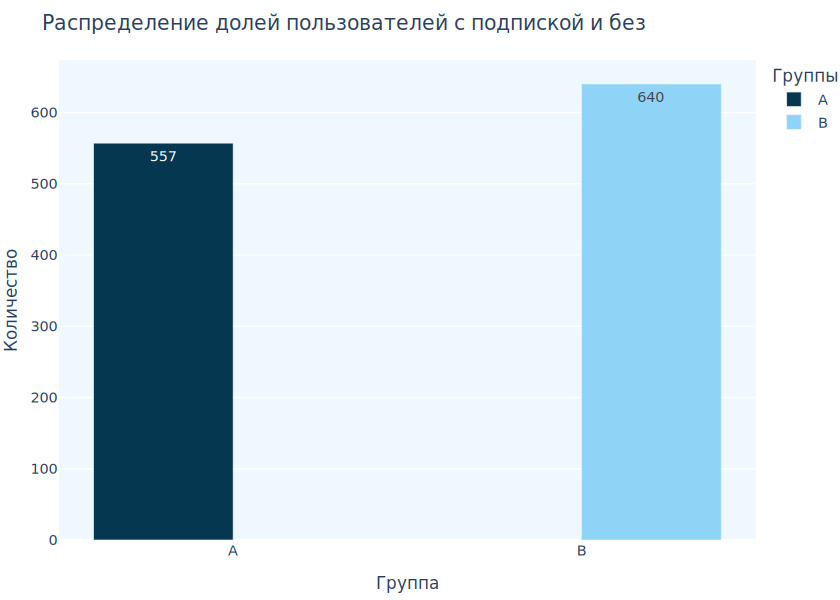

In [22]:
fig = px.bar(orders.groupby('group')['visitorid']
             .count()
             .reset_index()
             .rename(columns={
                 'group': 'Группа', 
                 'visitorid': 'Количество'}), 
             y='Количество', 
             x='Группа', 
             color='Группа', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей пользователей с подпиской и без',        
             barmode='group',
             text='Количество'
            )

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(showlegend=True, legend_title='Группы',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

Желательно, чтобы группы А и B были одинаковыми. Посмотрим, что может влиять на такую разницу.

Проверим дублирование записей о пользователях. 

In [23]:
orders[orders.duplicated(subset=['visitorid'], keep=False)].sort_values(by='visitorid')

,transactionid,visitorid,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
1102,1941707234,199603092,2019-08-12,6438,A
823,2971973105,199603092,2019-08-27,2790,A
134,62794304,199603092,2019-08-22,6976,A
...,...,...,...,...,...
1019,453824282,4256040402,2019-08-31,1850,B
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
682,1216533772,4266935830,2019-08-29,78990,B


В данных найдено 260 строк с дублирующимися пользователями. Часть из пользователей попала в одну группу теста, но в один день зафиксировано несколько транзакций от них. Часть пользователей попала __в обе группы теста__. 

Проверим пользователей, которые попали в обе группы теста. 

In [24]:
matching_visitors = uniq(orders)

58

58 пользователей попали в обе группы теста. 

Чтобы исключить влияние на результат, не будем использовать данные пользователей, которые попали в обе группы. Будем использовать данные убрав такие записи. 

In [25]:
orders_fixed = orders.query('visitorid not in @matching_visitors')

В таблице остались только пользователи, которые находятся строго в одной группе. 

In [26]:
uniq(orders_fixed)

0

Series([], Name: visitorid, dtype: int64)

Пользоватаелей, которые попали в обе группы теста больше нет в данных. Пользователи, которые несколько раз за один день совершали транзакции — в данных остались, так как не представляют проблемы, вполне естественно, что за один день может быть несколько заказов от одного пользователя. 

In [27]:
orders_fixed.groupby('group')['visitorid'].count()

group
A    468
B    548
Name: visitorid, dtype: int64

Количество пользователей в тесте уменьшилось, но они все равно представлены не в равных частях. В идеальных условиях теста количество пользователей в группах должно быть одинаковым. 

В группе ``А`` — ``468`` пользователей. 

В группе ``В`` — ``548`` пользователей.

Разница между группами порядка ``14.6%``. Но, так как невозможно привести к равному количеству пользователей в группах не нарушив результаты исследования, не будем уравнивать группы по количеству.

<a id="num5533"></a>
##### Visitors

In [28]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [29]:
visitors.groupby('group')['date'].count()

group
A    31
B    31
Name: date, dtype: int64

По датам результаты теста представлены верно, результаты для обоих тестов есть для каждой указанной даты. Каких-либо особых действий тут не требуется.

<a id="num6"></a>
## Исследование

<a id="num61"></a>
### Приоритизация гипотез

<a id="num611"></a>
#### ICE

In [30]:
pd.set_option('max_colwidth', 150)

In [31]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)

При ``ICE`` топ-3 гипотезы:
- 8 — __«Запустить акцию, дающую скидку на товар в день рождения»:__
    - ``impact`` — 9, 
    - ``confidence`` — 9, 
    - ``efforts`` — 5;
- 0 — __«Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей»:__ 
    - ``impact`` — 10, 
    - ``confidence`` — 8, 
    - ``efforts`` — 6;
- 7 — __«Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»:__
    - ``impact`` — 7, 
    - ``confidence`` — 8, 
    - ``efforts`` — 5;

При ``ICE`` наиболее перспективные гипотезы: 
- ``8 — «Запустить акцию, дающую скидку на товар в день рождения»``, 
- ``0 — «Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей»``, 
- ``7 — «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»``. 

Гипотезы были выбраны по довольно внушительным значениям __влияния__(impact — от 7 до 10) и __уверенности__(confidence — от 8 до 9), хоть и __усилия__(efforts) для проверки этих гипотез не самые малые(от 5 до 6). 
Можно заметить, что при ICE в приоритет попали гипотезы с макисмальным влиянием из всех остальных гипотез. 

<a id="num612"></a>
#### RICE

In [32]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

При ``RICE`` топ-3 гипотезы:
- __«Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»:__
    - ``reach`` — 10, 
    - ``impact`` — 7, 
    - ``confidence`` — 8, 
    - ``efforts`` — 5;
- __«Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа»:__
    - ``reach`` — 8, 
    - ``impact`` — 3, 
    - ``confidence`` — 7, 
    - ``efforts`` — 3;
- __«Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей»:__
    - ``reach`` — 3, 
    - ``impact`` — 10, 
    - ``confidence`` — 8, 
    - ``efforts`` — 6;

При ``RICE`` распределение приоритетов немного сместилось, в топе уже не удерживаются гипотезы с каким-то одним преобладающим значением. 

<a id="num613"></a>
#### Анализ результатов между ICE и RICE

In [33]:
display(hypothesis.sort_values(by='ICE', ascending=False))
display(hypothesis.sort_values(by='RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


В зависимости от применения каждого фреймворка, приоритизация гипотез меняется.

Единственным пересечением гипотез являются гипотезы ``0`` — __«Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей»__ и гипотеза ``7`` — __«Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»__.

Из приведенных гипотез, гипотеза ``8`` — о запуске акции со скидкой на день рождения, и гипотеза ``0`` — о добавлении двух новых каналов привлечении трафика, имеют самые высокие коэффициенты по показателям ``impact`` и ``confidence``, а затраты на проверку — средние. 

При подсчете показателя ``ICE`` обе гипотезы стояли в приоритете проверки. 

При подсчете показателя ``RICE`` гипотеза ``8`` оказалась не в приоритете проверки. Не смотря на то, что прочие коэффициенты большие, охват предполагается минимальный, таким образом эту гипотезу стоит проверить, но не в первую очередь.  

При введении дополнительного коэффициента охвата, приоритет гипотез поменялся. Если предполагается, что гипотеза будет задевать большое количество пользователей, ее приоритет может измениться на более высокий. 

<a id="num7"></a>
## Анализ A/B-теста

Для дальнейшего анализа соберем таблицу с данными о группах теста, количестве заказов, количестве покупателей и количестве посетителей на каждый день теста. 

In [34]:
groups = orders_fixed[['date', 'group']].drop_duplicates()

orders_agg = (groups.apply(
    lambda x: orders_fixed[np.logical_and(orders_fixed['date'] <= x['date'], 
                                          orders_fixed['group'] == x['group'])]
    .agg({
        'date': 'max',
        'group': 'max',
        'transactionid': 'nunique',
        'visitorid': 'nunique',
        'revenue': 'sum',}),
    axis=1,).sort_values(by=['date', 'group']))

visitors_agg = (groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                      visitors['group'] == x['group'])]
    .agg({
        'date': 'max', 
        'group': 'max', 
        'visitors': 'sum'}),
    axis=1,).sort_values(by=['date', 'group']))

cumulative_data = orders_agg.merge(
    visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors']

In [35]:
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


В полученной таблице ``62`` строки, ``31`` запить о данных для группы ``А``, ``31`` — для группы ``В``.

In [36]:
cumulative_data['date'].nunique()

31

In [37]:
orders['date'].nunique()

31

In [38]:
check = pd.DataFrame()
check['date'] = cumulative_data['date'].sort_values().unique() == orders['date'].sort_values().unique()
check

,date
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


Данные в объединенной таблице, если сравнивать по столбцу даты, совпадают с данными о дате в оригинальной таблице. 

<a id="num71"></a>
### График кумулятивной выручки по группам

Построим график кумулятивной выручки по группам теста.

In [39]:
cumulative_revenue = cumulative_data.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum().reset_index()

In [40]:
cumulative_rev_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders', 'visitors']]
cumulative_rev_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders', 'visitors']]

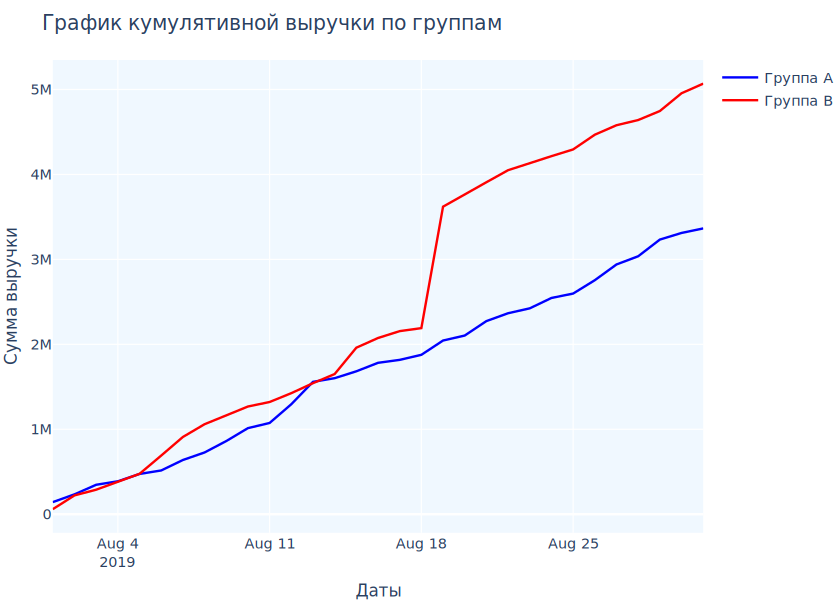

In [41]:
cumulative(cumulative_rev_a['date'],
          cumulative_rev_a['revenue'],
          cumulative_rev_b['date'],
          cumulative_rev_b['revenue'],
          title_name='График кумулятивной выручки по группам',
          y_name='Сумма выручки',
          x_name='Даты',
          )

Первые ``18`` дней теста, данные о выручке у обоих групп совпадали. ``19-го`` числа данные в группе В выросли, так, за один день сумма выручки __в группе В выросла__ ``с 2.2 млн до 3.6 млн``. 

В это же время в группе А никаких резких изменений не замечено. 

Увы, так как данных о дате запуска у нас нет, могу только предполагать причины внезапного роста. Либо на данные влияют большие заказы в группе ``B``, что могло случиться в следствии нового функционала. 

<a id="num72"></a>
### График кумулятивного среднего чека по группам

Построим график кумулятивного среднего чека по группам. 

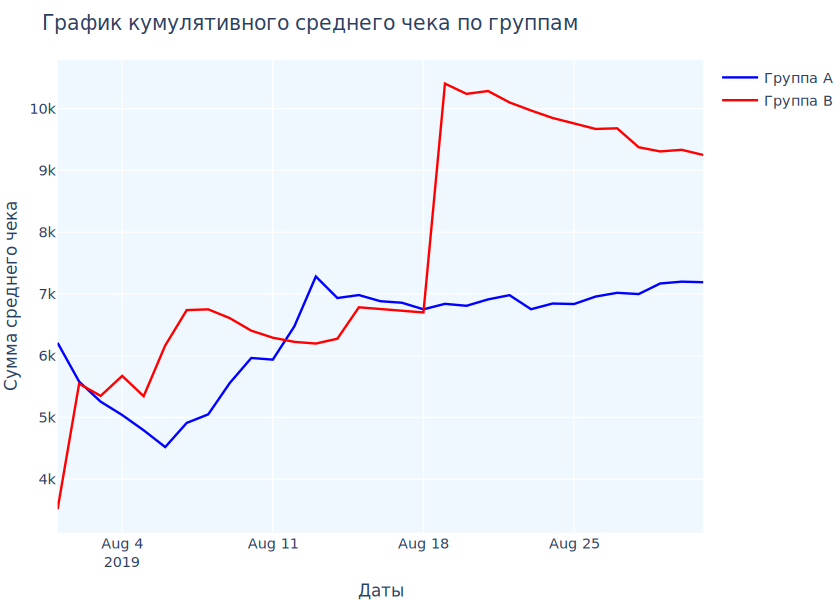

In [42]:
cumulative(cumulative_rev_a['date'], 
           cumulative_rev_a['revenue']/cumulative_rev_a['orders'], 
           cumulative_rev_b['date'],
           cumulative_rev_b['revenue']/cumulative_rev_b['orders'],
           title_name='График кумулятивного среднего чека по группам',
           y_name='Сумма среднего чека',
           x_name='Даты')

На графике куммулятивного среднего чека также видно резкое увеличение начиная с 19-го числа. Стоит провести анализ по данным без больших заказов, так как их можно считать выбросами.  

<a id="num73"></a>
### График относительного изменения кумулятивного среднего чека группы B к группе A.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [43]:
merged_cumulative_rev = cumulative_rev_a.merge(cumulative_rev_b, 
                                                 left_on='date', 
                                                 right_on='date', 
                                                 how='left', 
                                                 suffixes=['A', 'B'])

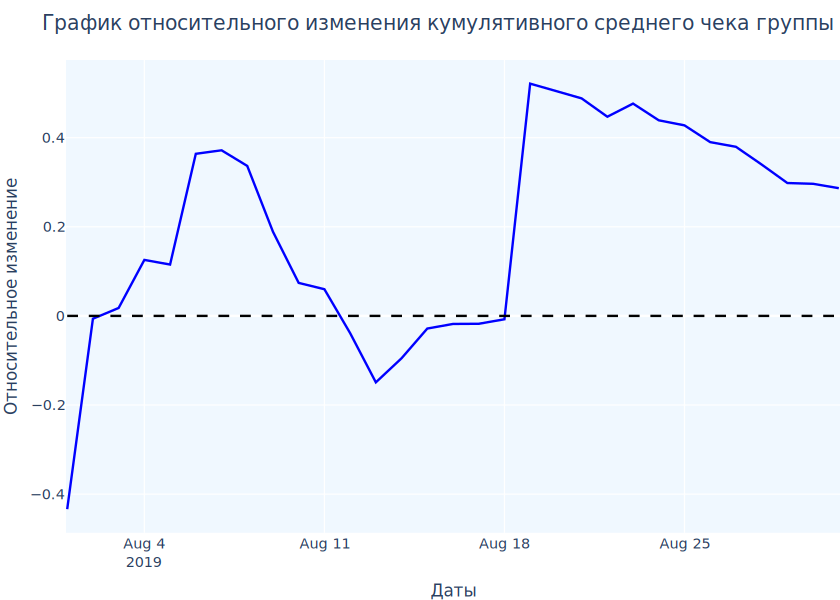

In [44]:
cumulative(
    merged_cumulative_rev['date'],
    ((merged_cumulative_rev['revenueB'] / merged_cumulative_rev['ordersB']) / 
    (merged_cumulative_rev['revenueA'] / merged_cumulative_rev['ordersA']) - 1),
    axhline='one', one_y=0,
    title_name='График относительного изменения кумулятивного среднего чека группы B к группе A',
    y_name='Относительное изменение',
    x_name='Даты')


In [45]:
orders.query('group == "B"').sort_values(by='revenue', ascending=False).head(5)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
940,2420050534,4003628586,2019-08-08,58550,B


In [46]:
display('6 августа', orders.query('group == "B" and date == "2019-08-06"')['revenue'].sum(), 
        '7 августа', orders.query('group == "B" and date == "2019-08-07"')['revenue'].sum())

'6 августа'

242342

'7 августа'

225334

In [47]:
display('6 августа', orders.query('group == "A" and date == "2019-08-06"')['revenue'].sum(), 
        '7 августа', orders.query('group == "A" and date == "2019-08-07"')['revenue'].sum())

'6 августа'

48484

'7 августа'

142417

В некоторые даты было значительное различие куммулятивного среднего чека группы ``В``, к группе ``А``. Так на изменение ``19 августа`` в влияет то, что был заказ на очень большую сумму, что касается ``6 и 7 августа``, то на пик повлияли не изменения в группе ``В``, а малые суммы заказов в группе ``А``. 

<a id="num74"></a>
### График куммулятивного среднего количества заказов на посетителя по группам

Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

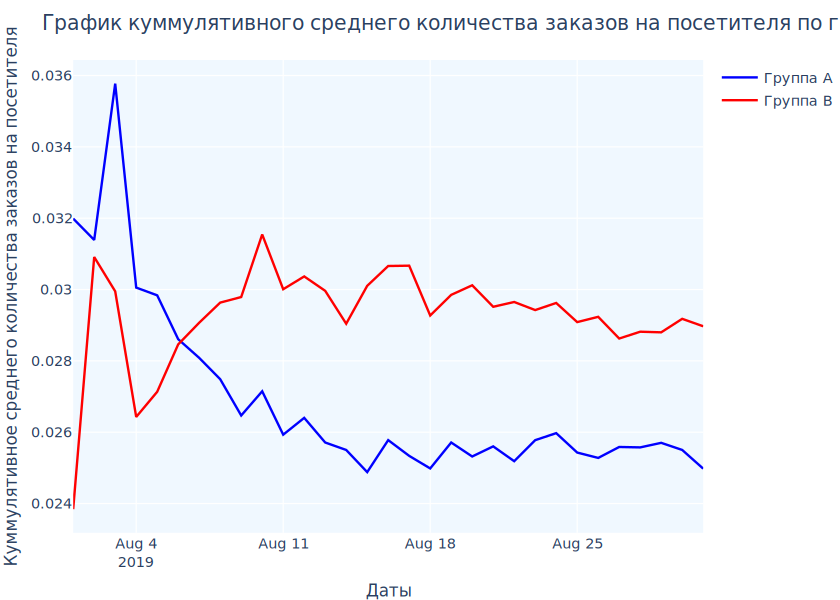

In [48]:
cumulative(
    merged_cumulative_rev['date'],
    merged_cumulative_rev['ordersA']/merged_cumulative_rev['visitorsA'],
    merged_cumulative_rev['date'],
    merged_cumulative_rev['ordersB']/merged_cumulative_rev['visitorsB'],
    title_name='График куммулятивного среднего количества заказов на посетителя по группам',
    y_name='Куммулятивное среднего количества заказов на посетителя',
    x_name='Даты')

Не смотря на то, что на графиках есть различия, сами графики между собой похожи. Колебания имеют схожий вид. Из этого следует, что куммулятивное среднее количества заказов по группам примерно равномерное. 

<a id="num75"></a>
### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

In [49]:
cumulative_data['conversion'] = (cumulative_data['orders'] / cumulative_data['visitors'])

cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

merged_cumulative_conversion = (cumulative_data_a[['date','conversion']]
                                .merge(cumulative_data_b[['date','conversion']], 
                                       left_on='date', 
                                       right_on='date', 
                                       how='left', 
                                       suffixes=['A', 'B']))

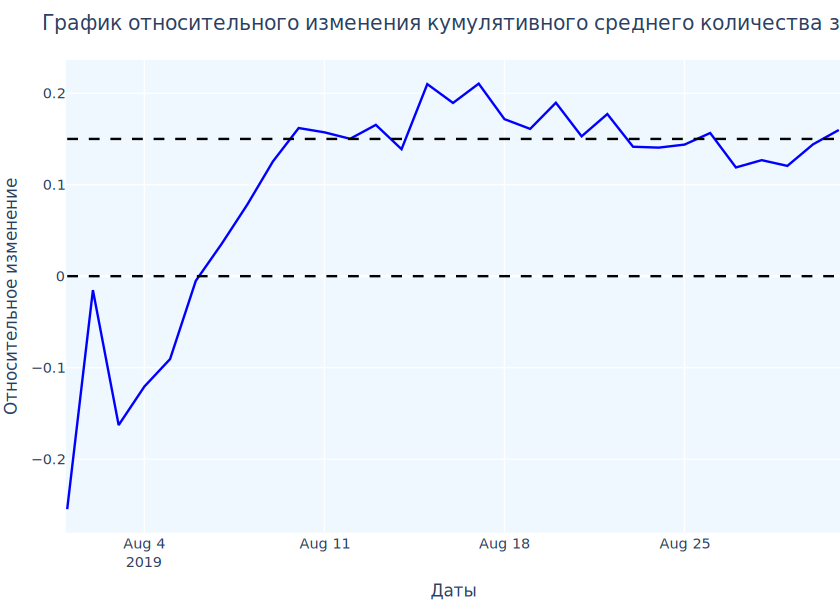

In [50]:
cumulative(merged_cumulative_conversion['date'],
          (merged_cumulative_conversion['conversionB']/merged_cumulative_conversion['conversionA']-1),
          axhline='two', 
          one_y=0,
          two_y=0.15,
          title_name='График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A',
          y_name='Относительное изменение',
          x_name='Даты')

Не смотря на то, что первую неделю группа ``В`` несколько отставала по конверсии от группы ``А``, начиная с ``7-го августа`` значения стали выше и оставались примерно на уровне ``15%`` от группы ``А``. 

<a id="num76"></a>
### График количества заказов по пользователям

Построим точечный график количества заказов по пользователям. 

In [51]:
orders_cumulative_data = orders_fixed.merge(
    cumulative_data, left_on=['date', 'group'], right_on=['date', 'group'])

orders_cumulative_data = (orders_cumulative_data
                          .rename(columns={
                              'transactionid': 'transactionid', 
                              'visitorid': 'visitorid', 
                              'date': 'date',
                              'revenue_x': 'revenue_per_user',
                              'group': 'group',
                              'orders': 'orders_daily',
                              'buyers': 'buyers_daily',
                              'revenue_y': 'revenue_daily',
                              'visitors':'visitors_daily'}))

In [52]:
orders_count_fixed = (
    orders_cumulative_data.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'}))

orders_count_fixed.columns = ['visitorid', 'orders_count']

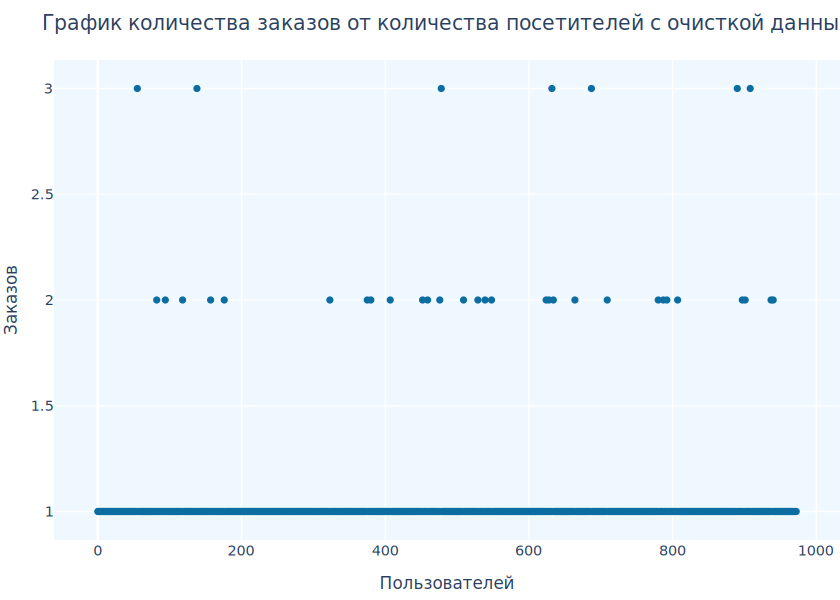

In [53]:
fig = px.scatter(orders_count_fixed, 
                 x=orders_count_fixed.index,  
                 y='orders_count',  
                 color_discrete_sequence=[colors[2]],
                 title='График количества заказов от количества посетителей с очисткой данных')

fig.update_layout(xaxis_title='Пользователей', yaxis_title='Заказов',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

In [54]:
display(orders_count_fixed[orders_count_fixed['orders_count']==orders_count_fixed['orders_count'].max()])
display(orders_count_fixed[orders_count_fixed['orders_count']==orders_count_fixed['orders_count'].min()])

,visitorid,orders_count
55,249864742,3
138,611059232,3
478,2108163459,3
632,2742574263,3
687,2988190573,3
890,3908431265,3
908,3967698036,3


,visitorid,orders_count
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


Ранее из таблицы были убраны пользователи, которые попали в обе группы А/В теста, по оставшимся данным только ``7`` пользователей сделали максимальное количество заказов — ``3``. ``937`` пользователей из ``1031`` сделали по одному заказу.

<a id="num77"></a>
### Перцентили количества заказов на пользователя.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [55]:
np.percentile(orders_count_fixed['orders_count'], [90, 95, 99])

array([1., 1., 2.])

Для данных без пользователей, которые попали в обе группы A/B теста, __нормальными границами__ заказов считается ``1-2 заказа``. 

<a id="num78"></a>
### График стоимостей заказов

Построим точечный график стоимостей заказов.

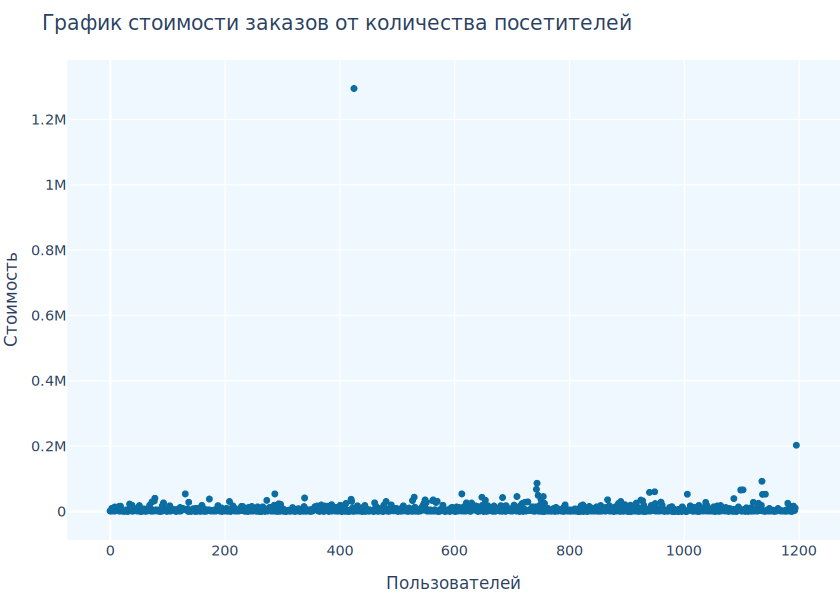

In [56]:
fig = px.scatter(orders_fixed, 
                 x=orders_fixed.index,  
                 y='revenue',  
                 color_discrete_sequence=[colors[2]],
                 title='График стоимости заказов от количества посетителей')

fig.update_layout(xaxis_title='Пользователей', yaxis_title='Стоимость',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

Для данных без пользователей, которые попали в обе группы A/B теста, в целом сумма не превышает ``150 тысяч``, в редких случаях сумма заказа сильно больше.  

<a id="num79"></a>
### Перцентили стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [57]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Для данных без пользователей, которые попали в обе группы A/B теста, нормальными границами стоимости заказов можно считать сумму ``от 18168 до 58233.2`` валютных единиц, все остальные значения можно считать выбросами. 

<a id="num710"></a>
### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитайтаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Прежде чем приступим к анализу, определимся с нулевой и альтернативной гипотезами. 

- H0: статистически значимых различий в среднем количестве заказов на посетителя между группами А и В по «сырым» данным нет.
- H1: статистически значимые различия в среднем количестве заказов на посетителя между группами А и В по «сырым» данным есть.

__Из данных исключены пользователи, которые попали в обе группы одновременно.__

In [58]:
orders_a = (
    orders_cumulative_data[orders_cumulative_data['group'] == 'A'][['date', 'transactionid', 'visitorid']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique}))

orders_a.columns = ['date', 'orders_a']

orders_b = (
    orders_cumulative_data[orders_cumulative_data['group'] == 'B'][['date', 'transactionid', 'visitorid']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_b.columns = ['date', 'orders_b']

data_orders = (
    orders_a.merge(
        orders_b, left_on='date', right_on='date', how='left'
    ))

In [59]:
orders_a_list = pd.concat([orders_a['orders_a'], 
                           pd.Series(0, index=np.arange(data_orders['orders_a'].sum() - len(orders_a['orders_a'])), 
                                     name='orders',),],axis=0,)

orders_b_list = pd.concat([orders_b['orders_b'], 
                           pd.Series(0, index=np.arange(data_orders['orders_b'].sum() - len(orders_b['orders_b'])),
                                     name='orders',),],axis=0,)
display('p-value: ' + "{0:.5f}".format(stats.mannwhitneyu(data_orders['orders_a'], data_orders['orders_b'])[1]))
display('Относительный прирост: ' + "{0:.3f}".format(data_orders['orders_b'].mean() / data_orders['orders_a'].mean() - 1))

'p-value: 0.04906'

'Относительный прирост: 0.171'

P-value — ``4.9%``, это меньше обычного уровня значимости 0.05, что указывает на наличие статистически значимых различий между группами.

Относительный прирост среднего количества заказов группы ``B`` к среднему количеству заказов группы ``A`` составляет ``17.1%``. Это значение говорит о том, что в группе ``B`` в среднем на ``17.1%`` больше заказов по сравнению с группой ``A``.

<a id="num711"></a>
### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Прежде чем приступим к анализу, определимся с нулевой и альтернативной гипотезами.

- H0: статистически значимых различий в среднем чеке заказа между группами по «сырым» данным А и В нет.
- H1: статистически значимые различия в среднем чеке заказа между группами по «сырым» данным А и В есть.

__Из данных исключены пользователи, которые попали в обе группы одновременно.__

In [60]:
revenue_a = (
    orders_cumulative_data[orders_cumulative_data['group'] == 'A'][['date', 'revenue_per_user']]
    .groupby('date', as_index=False)
    .agg({'revenue_per_user': 'sum'}))

revenue_a.columns = ['date', 'revenue_a']

revenue_b = (
    orders_cumulative_data[orders_cumulative_data['group'] == 'B'][['date', 'revenue_per_user']]
    .groupby('date', as_index=False)
    .agg({'revenue_per_user': 'sum'}))

revenue_b.columns = ['date', 'revenue_b']

data_rev = (
    revenue_a.merge(
        revenue_b, left_on='date', right_on='date', how='left'
    ))

In [61]:
revenue_a_list = pd.concat([revenue_a['revenue_a'], 
                           pd.Series(0, index=np.arange(data_rev['revenue_a'].sum() - len(revenue_a['revenue_a'])), 
                                     name='orders',),],axis=0,)

revenue_b_list = pd.concat([revenue_b['revenue_b'], 
                           pd.Series(0, index=np.arange(data_rev['revenue_b'].sum() - len(revenue_b['revenue_b'])),
                                     name='orders',),],axis=0,)

display('p-value: ' + "{0:.5f}".format(stats.mannwhitneyu(data_rev['revenue_a'], data_rev['revenue_b'])[1]))
display('Относительный прирост: ' +  "{0:.3f}".format(data_rev['revenue_b'].mean() / data_rev['revenue_a'].mean() - 1))

'p-value: 0.22599'

'Относительный прирост: 0.507'

P-value — ``22.6%``, это указывает, что нет статистически значимых различий между группами.

Относительный прирост суммы среднего чека группы ``B`` к среднему чеку группы ``A`` составляет ``50.7%``. В группе ``В``, средний чек практически в два раза больше чем в группе ``А``. 

<a id="num712"></a>
### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Прежде чем приступим к анализу, определимся с нулевой и альтернативной гипотезами. Оставих их такими же, как и для анализа по сырым данным. 

- H0: статистически значимых различий в среднем количестве заказов на посетителя между группами А и В по «очищенным» данным нет.
- H1: статистически значимые различия в среднем количестве заказов на посетителя между группами А и В по «очищенным» данным есть.

In [62]:
orders_cumulative_perc = (orders_cumulative_data
                          .query('revenue_per_user < 58233.2 and visitorid in @orders_cumulative_data["visitorid"]'))

In [63]:
orders_a_clean = (    
    orders_cumulative_perc[orders_cumulative_perc['group'] == 'A'][['date', 'transactionid', 'visitorid']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique}))

orders_a_clean.columns = ['date', 'orders_a']

orders_b_clean = (
    orders_cumulative_perc[orders_cumulative_perc['group'] == 'B'][['date', 'transactionid', 'visitorid']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_b_clean.columns = ['date', 'orders_b']

data_orders_clean = (
    orders_a_clean.merge(
        orders_b_clean, left_on='date', right_on='date', how='left'
    ))

In [64]:
display('p-value: ' +  "{0:.5f}".format(stats.mannwhitneyu(data_orders_clean['orders_a'], data_orders_clean['orders_b'])[1]))
display('Относительный прирост: ' +  "{0:.3f}".format(data_orders_clean['orders_b'].mean() / data_orders_clean['orders_a'].mean() - 1))

'p-value: 0.04364'

'Относительный прирост: 0.175'

С небольшими различиями результат такой же как и в «сырых» данных. 

P-value — меньше уровня значимости 0.05 — ``4.3%``, это указывает на наличие статистически значимых различий между группами.

Относительный прирост среднего количества заказов группы ``B`` к среднему количеству заказов группы ``A`` составляет ``17.5%``. Это значение говорит о том, что в группе ``B`` в среднем на ``17.5%`` больше заказов по сравнению с группой ``A``.

<a id="num713"></a>
### Cтатистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Прежде чем приступим к анализу, определимся с нулевой и альтернативной гипотезами. Оставих их такими же, как и для анализа по сырым данным. 

- H0: статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным А и В нет.
- H1: статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным А и В есть.

In [65]:
revenue_a_clean = (
    orders_cumulative_perc[orders_cumulative_perc['group'] == 'A'][['date', 'revenue_per_user']]
    .groupby('date', as_index=False)
    .agg({'revenue_per_user': 'sum'}))

revenue_a_clean.columns = ['date', 'revenue_a']

revenue_b_clean = (
    orders_cumulative_perc[orders_cumulative_perc['group'] == 'B'][['date', 'revenue_per_user']]
    .groupby('date', as_index=False)
    .agg({'revenue_per_user': 'sum'}))

revenue_b_clean.columns = ['date', 'revenue_b']

data_rev_clean = (
    revenue_a_clean.merge(
        revenue_b_clean, left_on='date', right_on='date', how='left'
    ))

In [66]:
revenue_a_list_clean = pd.concat([revenue_a_clean['revenue_a'], 
                           pd.Series(0, index=np.arange(data_rev_clean['revenue_a'].sum() - len(revenue_a_clean['revenue_a'])), 
                                     name='orders',),],axis=0,)

revenue_b_list_clean = pd.concat([revenue_b['revenue_b'], 
                           pd.Series(0, index=np.arange(data_rev_clean['revenue_b'].sum() - len(revenue_b_clean['revenue_b'])),
                                     name='orders',),],axis=0,)

display('p-value: ' +  "{0:.5f}".format(stats.mannwhitneyu(data_rev_clean['revenue_a'], data_rev_clean['revenue_b'])[1]))
display('Относительный прирост: ' +  "{0:.3f}".format(data_rev_clean['revenue_b'].mean() / data_rev_clean['revenue_a'].mean() - 1))

'p-value: 0.22064'

'Относительный прирост: 0.138'

P-value составляет ``0.22064``, что выше обычного уровня значимости 0.05. Это говорит о том, что нет статистически значимых различий в выручке между группами.

Относительный прирост средней выручки группы ``B`` к средней выручке группы ``A`` составляет ``13.8%``.

<a id="num8"></a>
## Выводы

1. **Обзор данных:** 

    - В предоставленных данных были три таблицы: ``hypothesis`` с информацией о выдвинутых гипотезах, ``orders`` с данными о финансовых операциях в магазине и ``visitors`` с данными о посещении сайта пользователями, за каждый день представлены данные отдельно по каждой группе теста.
    - В таблице ``hypothesis`` содержалась информация о ``9`` гипотезах, включая их значения: Reach, Impact, Confidence и Effort. Данные были в полном порядке, пропусков нет, данные не дублировались. 
    - В таблице ``orders`` представлена информация о ``1197 `` заказах, включая идентификаторы покупателей, идентификаторы транзакций, дату и сумму каждой покупки. Тип данных для столбца ``date`` был исправлен на дату. Из данных были удалены пользователи, которые попали в обе группы теста одновременно. 
    - В таблице ``visitors`` содержалась информация о ``62 ``датах, в которые пользователи заходили на сайт, количестве пользователей в этот день, а также о группе теста. В данных пропусков не было, данные не дублировались. 

2. **Анализ данных:** 

    Таблица ``hypothesis``. 

    - Количество гипотез представлено девятью гипотезами, каждая из гипотез актуальна и в перспективе может привести к увеличению прибыли, либо уровня взаимодействия с платформой. 
    - Коэффициенты у каждого значения разные, что в итоге позволяет выбрать самые перспективные гипотезы и советовать анализировать их в первую очередь. 
    
    Таблица ``orders``. 
    - Количество пользователей в тесте представлено не в равных частях. В идеальных условиях теста количество пользователей в группах должно быть одинаковым. 
    - В группе ``А`` — ``468`` пользователей. 
    - В группе ``В`` — ``548`` пользователей.
    - Разница между группами порядка ``14.6%``. Во избежание влияния на результат, группы были оставлены в том же количестве. 
    
    Таблица ``visitors``. 
    - Таблица отображает данные со счетчика посещений, что дает нам общее представление о посещаемости сайта в целом и отдельно по группам теста. 

3. **Проверка гипотез:**

    - При использовании фреймворка ``ICE`` топ-3 гипотезы определены преимущественно по высоким значениям ``impact и confidence``, с умеренными усилиями для проверки.
    - Гипотезы ``8 и 0`` выделяются на фоне других при анализе ``ICE``, обладая высоким влиянием и уверенностью.
    - Фреймворк ``RICE`` учитывает дополнительный параметр охвата (reach), что влияет на пересмотр приоритетов гипотез.
    - Гипотеза ``8``, хотя имеет высокие значения ``impact и confidence``, теряет приоритет при использовании ``RICE`` из-за низкого охвата.
    - Пересечение гипотез в обоих фреймворках - гипотезы ``0 и 7``.
    - Введение дополнительного коэффициента охвата в ``RICE`` может измениться приоритет гипотез в зависимости от охвата пользователей.

4. **Анализ А/В теста:**

    __Cтатистическая значимость различий в среднем количестве заказов между группами А и В.__

    Сырые данные: 
- P-value равно ``4.9%``, что меньше обычного уровня значимости 0.05. Это позволяет __отвергнуть нулевую гипотезу__ ``H0``, указывая на наличие статистически значимых различий в среднем количестве заказов между группами А и В по «сырым» данным.
Относительный прирост среднего количества заказов в группе B по сравнению с группой A составляет ``17.1%``.

    Очищенные данные:
- P-value меньше уровня значимости — ``4.3%``, что также позволяет __отвергнуть нулевую гипотезу__ ``H0`` и указывает на наличие статистически значимых различий между группами по «очищенным» данным.
Относительный прирост среднего количества заказов в группе B по сравнению с группой A составляет ``17.5%``.

    Вывод:
- Исходя из анализа, можно сказать, что статистически значимые различия в среднем количестве заказов между группами А и В обнаружены как по «сырым», так и по «очищенным» данным. Кроме того, относительный прирост количества заказов в группе B по сравнению с группой A примерно одинаков как для «сырых», так и для «очищенных» данных.

    __Cтатистическая значимость различий в среднем чеке заказа между группами А и В.__

    Сырые данные:
- P-value равно 22.6%, что превышает уровень значимости 0.05. Это означает, что __нет статистически значимых различий__ в среднем чеке между группами по «сырым» данным.
Относительный прирост суммы среднего чека группы B к среднему чеку группы A составляет ``50.7%``. Это высокий процент и может указывать на потенциальные различия в поведении клиентов между группами.

    Очищенные данные:
- P-value для «очищенных» данных равно 0.22064, что также превышает уровень значимости 0.05. Это говорит о том, что после удаления выбросов __нет статистически значимых различий__ в среднем чеке между группами.
Относительный прирост средней выручки группы B к средней выручке группы A уменьшился до ``13.8%``. Это также меньше, чем при анализе «сырых» данных.

    Вывод:
- На основе текущих данных __нет статистически значимых различий__ в среднем чеке между группами ни по «сырым», ни по «очищенным» данным. Однако, стоит отметить, что в случае «сырых» данных относительный прирост среднего чека в группе B был значительно выше — 50.7%, чем после очистки данных — 13.8%. Вероятнее всего это влияние выбросов на результат. 

<a id="num9"></a>
## Рекомендации

__Гипотезы.__

- Стоит обратить внимание на гипотезы:  0 — __«Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей»__ и 7 — __«Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»__.
Это две перспективные гипотезы, которые оказывались в топе при использовании и фреймворка ICE, и фреймворка RICE. 

__Рекомендация для теста о среднем количестве заказов между группами А и В:__

- На основе представленных результатов можно рекомендовать продолжить эксперимент и дополнительно изучить факторы, которые могли бы объяснить наблюдаемые различия между группами. 

__Рекомендация для теста о среднем чеке заказа между группами А и В:__

- Продолжение эксперимента может быть оправданным для дополнительного анализа и подтверждения результатов.

__Временные рамки:__

- Учитывая, что некоторые изменения по куммулятивным значениям показывали колебания, которые видны в рамках всего периода наблюдения, советую текущий эксперимента продлить еще на один месяц. 